In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Firstly, we define some functions that we will be used throughout the exploration and read the data. Though the column 'Code' may be useful for future data visualisations involving maps of boroughs, it will get in the way of creating graphs for this exploration stage. Thus, a function is created to remove this column.

In [73]:
def clean_data(df):

    '''Convert the column names to strings and set the column 'Borough' as the index.'''

    df.columns = df.columns.map(str)
    df.set_index('Borough', inplace=True)

def remove_code(df):

    '''Remove the column 'Code'.'''

    df.drop(['Code'], axis = 1, inplace = True)

# Read and clean sheets on survival rates
survivalrates = {}

for i in range(2002, 2019):
    survivalrates[str(i)] = pd.read_excel('data/prepared_data1.xlsx', sheet_name= str(i) + ' Survival Rates')
    clean_data(survivalrates[str(i)])

# Read and clean sheet on active enterprises
activeenterprises = pd.read_excel('data/prepared_data1.xlsx', sheet_name= 'Active Enterprises by Year')
clean_data(activeenterprises)

# Read and clean sheet on death rates
deathrates = pd.read_excel('data/prepared_data1.xlsx', sheet_name= 'Death Rates in % by Year')
clean_data(deathrates)

# Basic Statistics and Outliers
## Survival Rates
As there are multiple sheets with the survival rates of businesses (one for each year), we will first analyse one and assume that the basic statistics of other sheets would be similar.


In [74]:
# Print the dataframe for year 2002 and descriptive statistics about the data
print(survivalrates['2002'])
print(survivalrates['2002'].describe())

                             Code  1 Year Survival in %  2 Year Survival in %  \
Borough                                                                         
City of London          E09000001                  89.5                  79.9   
Barking and Dagenham    E09000002                  94.3                  77.0   
Barnet                  E09000003                  93.8                  77.5   
Bexley                  E09000004                  92.8                  77.8   
Brent                   E09000005                  93.6                  69.4   
Bromley                 E09000006                  93.4                  80.1   
Camden                  E09000007                  93.0                  76.2   
Croydon                 E09000008                  93.2                  77.4   
Ealing                  E09000009                  93.8                  74.6   
Enfield                 E09000010                  92.3                  77.4   
Greenwich               E090

It is expected that the mean of each column will decrease because the proportion of businesses started in 2002 that are still alive decreases as we measure longer periods. To get a better visualisation of the data, we will do a simple line graph of the 1, 2, 3, 4 and 5 year survival rates of businesses that started in 2002.

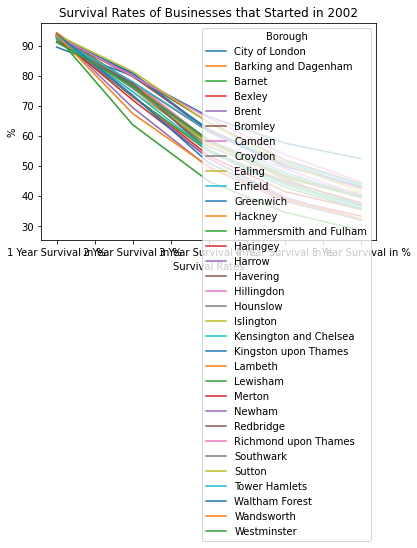

In [75]:
# Remove the column for 'Code' as it is not numeric
remove_code(survivalrates['2002'])

# Transpose the dataframe so that it can be plotted
survivalrates_transposed = survivalrates['2002'].transpose()

# Plot the transposed dataframe for all boroughs
survivalrates_transposed.plot()
plt.title('Survival Rates of Businesses that Started in 2002')
plt.xlabel('Survival Rates')
plt.ylabel('%')
plt.savefig('charts/survival_rates_2002.png')


From the line graph, we observe that the data aligns with the context. It is also observed that there are no obivous outliers.

As this is just exploring the data, the chart is messy. During the data visualisation stage, line graphs for all years for all boroughs will be created. The client would be able to choose the borough and then view the graph for each year in a slideshow feature. This would enable them to see whether there is a steep trend of survival rates, which would shed light on the difficulty of surviving from one year to another.

## Active Enterprises

Next, we will explore the data on the number of active enterprises through the years and identify outliers.

In [76]:
# Print the dataframe
print(activeenterprises)

                             Code   2002   2003   2004   2005   2006   2007  \
Borough                                                                       
City of London          E09000001  12715  12150  11980  11970  12240  12615   
Barking and Dagenham    E09000002   3435   3470   3120   3190   3280   3455   
Barnet                  E09000003  17705  17525  19655  19095  18565  18555   
Bexley                  E09000004   6455   6530   6450   6560   6710   6835   
Brent                   E09000005  11670  11800  11295  11250  11330  11750   
Bromley                 E09000006  11475  11585  11655  11755  11960  12430   
Camden                  E09000007  23660  22825  22910  22675  22750  23335   
Croydon                 E09000008  11540  11455  11230  11130  11385  11715   
Ealing                  E09000009  13070  13575  12830  12915  13060  13640   
Enfield                 E09000010   9000   9085   9305   9455   9715   9860   
Greenwich               E09000011   5540   5605   56

From looking at the data, it makes more sense to view the descriptive statistics of the data by borough. This is because the number of active enterprsies varies greatly by borough, but less so throughout the years.

In [77]:
# Remove the column for 'Code' as it is not numeric
remove_code(activeenterprises)

# Transpose the dataframe
activeenterprises_transposed = activeenterprises.transpose()

# Convert the data to int 
activeenterprises_transposed = activeenterprises_transposed.astype(int)

# Print the descriptive statistics of the number of active enterprises
print(activeenterprises_transposed.describe())


Borough  City of London  Barking and Dagenham        Barnet        Bexley  \
count         18.000000             18.000000     18.000000     18.000000   
mean       18919.722222           5010.000000  22487.500000   7848.333333   
std         7761.188598           1907.541535   4322.555157   1462.643658   
min        11970.000000           3120.000000  17525.000000   6450.000000   
25%        12640.000000           3458.750000  19161.250000   6741.250000   
50%        16040.000000           4235.000000  20935.000000   7205.000000   
75%        24410.000000           6342.500000  25781.250000   8913.750000   
max        32990.000000           8515.000000  29845.000000  10385.000000   

Borough         Brent       Bromley        Camden       Croydon        Ealing  \
count       18.000000     18.000000     18.000000     18.000000     18.000000   
mean     13799.166667  13933.333333  28018.888889  13519.722222  15887.777778   
std       2565.965734   2289.678888   5914.851834   2367.388405

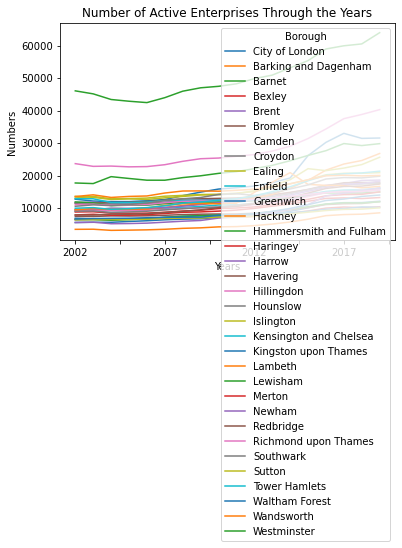

In [78]:
# Plot the transposed dataframe for all boroughs
activeenterprises_transposed.plot()
plt.title('Number of Active Enterprises Through the Years')
plt.xlabel('Years')
plt.ylabel('Numbers')
plt.savefig('charts/active_enterprises.png')

From the graph, it is observed that during the earlier years there was a decrease in the number of active enterprises in some boroughs. However, generally, there is an increase in the number of active enterprises meaning that birth rates are greater than death rates. There are also no obvious outliers. 

In the future, individual line graphs will be created for the client to view each one separately. 

## Death Rates

Finally, we will explore the data on the death rates of enterprises through the years and identify outliers.

In [79]:
# Print the dataframe and descriptive statistics about the data
print(deathrates)
print(deathrates.describe())

                             Code  2004  2005  2006  2007  2008  2009  2010  \
Borough                                                                       
City of London          E09000001   9.7   8.4   7.7  13.5   7.9   9.2   9.1   
Barking and Dagenham    E09000002  13.1  12.4  10.5  10.4  11.2  14.8  14.0   
Barnet                  E09000003  15.3  14.0  12.5  14.3  12.1  15.0  13.5   
Bexley                  E09000004  12.4  11.5  10.9  10.2  10.7  12.7  11.8   
Brent                   E09000005  15.4  13.3  11.7  11.6  11.0  14.4  11.2   
Bromley                 E09000006  11.8  11.1  10.1   9.7   9.7  13.5  10.9   
Camden                  E09000007  12.1  10.5   9.4  11.4   9.0  12.1  10.4   
Croydon                 E09000008  14.1  12.0  11.1  11.6  10.4  13.5  11.9   
Ealing                  E09000009  13.9  12.7  11.1  10.7  10.8  13.7  11.3   
Enfield                 E09000010  12.9  12.0  11.7  12.3  10.9  15.0  13.1   
Greenwich               E09000011  13.3  12.3  11.4 

From briefly looking at the data, the death rates do not seem to vary much between different boroughs and years. To get a better understanding of the data, we will view it in a boxplot.

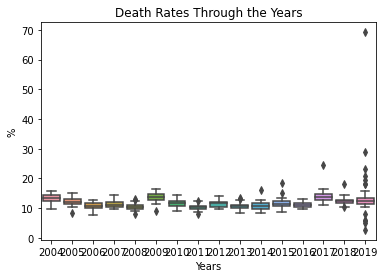

In [80]:
# Remove the column for 'Code' as it is not numeric
remove_code(deathrates)

# Plot a boxplot of the deathrates for each year
sns.boxplot(data = deathrates)
plt.title('Death Rates Through the Years')
plt.xlabel('Years')
plt.ylabel('%')
plt.savefig('charts/boxplot_deathrates.png')


From the boxplot, several years have outliers, but the year 2019 has more outliers and more extreme outliers. As this dataset is from 2019, it could be that the data for 2019 is not the most accurate. Thus, the data for the year 2019 will be removed.

In [81]:
# Remove the column '2019'
deathrates.drop(['2019'], axis = 1, inplace = True)

print(deathrates)

                        2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Borough                                                                        
City of London           9.7   8.4   7.7  13.5   7.9   9.2   9.1   9.8   9.9   
Barking and Dagenham    13.1  12.4  10.5  10.4  11.2  14.8  14.0  10.6  12.2   
Barnet                  15.3  14.0  12.5  14.3  12.1  15.0  13.5  12.5  13.7   
Bexley                  12.4  11.5  10.9  10.2  10.7  12.7  11.8   9.9  11.8   
Brent                   15.4  13.3  11.7  11.6  11.0  14.4  11.2  10.5  11.7   
Bromley                 11.8  11.1  10.1   9.7   9.7  13.5  10.9   9.6  10.5   
Camden                  12.1  10.5   9.4  11.4   9.0  12.1  10.4   9.4  10.9   
Croydon                 14.1  12.0  11.1  11.6  10.4  13.5  11.9  10.8  12.1   
Ealing                  13.9  12.7  11.1  10.7  10.8  13.7  11.3  10.0  11.1   
Enfield                 12.9  12.0  11.7  12.3  10.9  15.0  13.1  11.7  12.7   
Greenwich               13.3  12.3  11.4

# Problem 1: Are there any general trends with regard to 5-year survival rates?
As we're interested in analysing 5-year survival rates, we will create a dataframe with just that data for multiple years. As the available data is only up to year 2019, there is only data of the 5-year survival rates up to year 2014.

In [82]:
# Create a list and append 'Borough'
five_year_survival_rate_list = []
five_year_survival_rate_list.append(list(survivalrates['2002'].index))

# Append the relevant 5-year survival rates for businesses created in various years
for i in range (2002, 2015):
    five_year_survival_rate_list.append(list(survivalrates[str(i)]['5 Year Survival in %']))

# Transpose and read the dataframe
five_year_survival_rate_df = pd.DataFrame(five_year_survival_rate_list).transpose()

# Set the column names
five_year_survival_rate_df.columns=['Borough', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

print(five_year_survival_rate_df)

                   Borough  2002  2003  2004  2005  2006  2007  2008  2009  \
0           City of London  52.4  52.7  52.8  43.3  50.2  49.8  33.2  36.3   
1     Barking and Dagenham  40.2  39.1  38.5  33.9  39.2  38.2  34.7  33.3   
2                   Barnet  36.7  38.2  39.4  42.4  42.1  42.5  39.5  37.6   
3                   Bexley  42.5  43.6  44.1  45.4  45.8  43.1  43.4  43.8   
4                    Brent  32.1    34  38.6    40    38  39.7  37.9  37.4   
5                  Bromley  44.1  46.1  46.9  42.4  44.9  43.7  39.6  41.7   
6                   Camden  40.5  41.9  47.5  43.1  42.7  43.4  38.1  38.6   
7                  Croydon  40.1  41.3  42.9  42.1  38.6  41.4    40  39.3   
8                   Ealing  40.8  35.1  38.8  37.3  40.8  38.6  38.5  40.2   
9                  Enfield  39.7  41.9  42.9    39  39.7  41.6  38.1  37.4   
10               Greenwich    37  39.7    40  40.6  39.9  39.7  35.9  40.8   
11                 Hackney  39.8    43  44.3  42.5  43.2  46.1  

As we have created a new dataframe, we will need to clean the data.

In [83]:
# Clean the data
clean_data(five_year_survival_rate_df)

# Check if the datatypes are correct
print(five_year_survival_rate_df.info(verbose=True))

# Convert datatype from object to int
five_year_survival_rate_df = five_year_survival_rate_df.astype(float)

print(five_year_survival_rate_df)


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, City of London to Westminster
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2002    33 non-null     object
 1   2003    33 non-null     object
 2   2004    33 non-null     object
 3   2005    33 non-null     object
 4   2006    33 non-null     object
 5   2007    33 non-null     object
 6   2008    33 non-null     object
 7   2009    33 non-null     object
 8   2010    33 non-null     object
 9   2011    33 non-null     object
 10  2012    33 non-null     object
 11  2013    33 non-null     object
 12  2014    33 non-null     object
dtypes: object(13)
memory usage: 3.6+ KB
None
                        2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Borough                                                                        
City of London          52.4  52.7  52.8  43.3  50.2  49.8  33.2  36.3  39.3   
Barking and Dagenham    40.2  39.1  38.5  33.9  39.2  

Now we will create a box plot to view the spread of the 5-year survival rates for each year to analyse the general trend of these rates, which is one of our business question. It also helps us to find if there are any outliers in the data as previously only the data from year 2002 was analysed. 

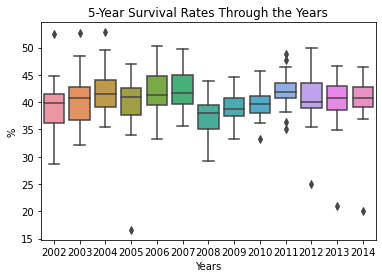

In [84]:
# Plot a boxplot of the 5-year survival rates in different years
sns.boxplot(data=five_year_survival_rate_df)
plt.title('5-Year Survival Rates Through the Years')
plt.xlabel('Years')
plt.ylabel('%')
plt.savefig('charts/boxplot_5-year_survival_rate.png')

From the boxplot, we observe that there is no general trend with regard to 5-year survival rates as the interquartile range and median for all years do not vary signicantly. An exception would be the 5-year survival rates for businesses created in 2008, but this could be due to the 2008 financial crisis.

We also observe that there are some outliers that were not picked up earlier when only the year 2002 was analysed. To check if these outliers should be removed, we will analyse the extreme outliers in year 2005, 2012, 2013 and 2014.

In [85]:
# Print the data rows with outliers
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2005'] < 25])
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2012'] < 30])
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2013'] < 30])
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2014'] < 30])

         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Borough                                                                     
Newham   32.3  36.8  37.3  16.6  35.0  36.2  29.2  35.0  33.3  36.4  36.8   

         2013  2014  
Borough              
Newham   34.9  37.0  
         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Borough                                                                     
Lambeth  37.8  35.4  39.2  39.0  39.1  39.6  34.8  38.8  42.1  41.4  25.0   

         2013  2014  
Borough              
Lambeth  20.9  20.1  
         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Borough                                                                     
Lambeth  37.8  35.4  39.2  39.0  39.1  39.6  34.8  38.8  42.1  41.4  25.0   

         2013  2014  
Borough              
Lambeth  20.9  20.1  
         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Borough                      

To analyse this further, it would be good to plot the other survival rates of these boroughs during the year.

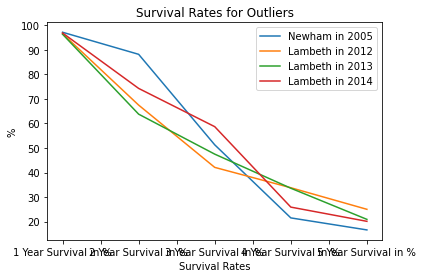

In [86]:
# Remove the column for 'Code' as it is not numeric
for year in [2005, 2012, 2013, 2014]:
    remove_code(survivalrates[str(year)])

# Plot the outliers
survivalrates['2005'].loc['Newham'].plot(label = 'Newham in 2005')
survivalrates['2012'].loc['Lambeth'].plot(label = 'Lambeth in 2012')
survivalrates['2013'].loc['Lambeth'].plot(label = 'Lambeth in 2013')
survivalrates['2014'].loc['Lambeth'].plot(label = 'Lambeth in 2014')
plt.title('Survival Rates for Outliers')
plt.xlabel('Survival Rates')
plt.ylabel('%')
plt.legend()
plt.savefig('charts/survival_rates_outliers.png')

As there doesn't seem to be anything wrong with the data, it could be that the data are just extreme values. Thus the outliers will not be removed and we can still conclude that there is no general trend regarding 5-year survival rates.

# Problem 2: Which borough has the best 5-year survival rate?

As we are trying to find the borough with the best 5-year survival rate, we will calculate the average 5-year survival rate for each borough. We will also save this dataframe with a new column with the averages as a new Excel file for future use.

In [87]:
# Add a column with the average 5-year survival rate in each borough
five_year_survival_rate_df['mean'] = five_year_survival_rate_df.iloc[:, 1:14].mean(axis=1)

# Round the averages to one decimal place
five_year_survival_rate_df['mean'] = five_year_survival_rate_df['mean'].round(decimals = 1)

# Create a new Excel file
with pd.ExcelWriter('data/prepared_data2.xlsx') as writer:  
    five_year_survival_rate_df.to_excel(writer, sheet_name='5-Year Survival Rates')

To see the averages of all boroughs and identify the one with the highest average, we will view this data on a barchart.

The borough with the highest average 5-year survival rate is Sutton with a survival rate of 45.8%


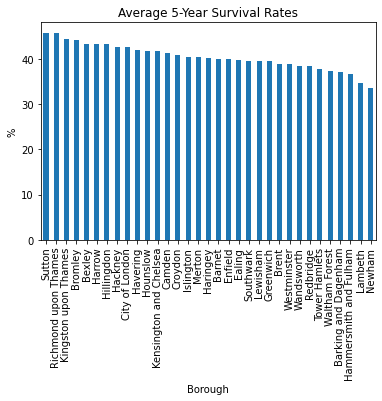

In [88]:
# Plot a bar graph with the 5-year survival rate average for each borough
five_year_survival_rate_df.sort_values('mean', ascending = False)['mean'].plot.bar()
plt.title('Average 5-Year Survival Rates')
plt.xlabel('Borough')
plt.ylabel('%')
plt.savefig('charts/bargraph_ave_5-year_survival_rate.png')

# Identify the borough with the highest average 5-year survival rate
max = five_year_survival_rate_df['mean'].idxmax()
print('The borough with the highest average 5-year survival rate is ' + str(max) + ' with a survival rate of ' + str(five_year_survival_rate_df['mean'].max()) + '%')

Thus, we identify that Sutton has the highest 5-year survival rate based on past data. Based on just this data alone, Sutton seems to be a good place to start a business as it is where the largest proportion of businesses survive for 5 years or longer.

# Problem 3: Which boroughs have the highest economic activity, indicated by the number of active enterprises?

Next, we will look at the number of active enterprises in each borough. To get a better idea of the current economic situtation in each borough, we will use data from the most recent year available in the dataset (year 2019), to find the borough with the highest number of active enterprises.

The borough with the highest number of active enterprises in 2019 is Westminster with 63980 enterprises.


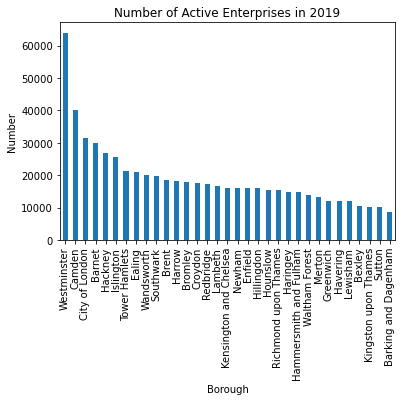

In [89]:
# Plot a bar graph of with the number of active enterprises in each borough in 2019
activeenterprises.sort_values('2019', ascending = False)['2019'].plot.bar()
plt.title('Number of Active Enterprises in 2019')
plt.xlabel('Borough')
plt.ylabel('Number')
plt.savefig('charts/bargraph_active_enterprises_2019.png')

# Identify the borough with the highest number of active enterprises in 2019
max = activeenterprises['2019'].idxmax()
print('The borough with the highest number of active enterprises in 2019 is ' + str(max) + ' with ' + str(activeenterprises['2019'].max()) + ' enterprises.')

Thus, we observe that the boroughs with the highest number of active enterprises are Westminister, Camden, City of London and Barnet. This offers insight on the economic activity of these areas, which reflects the accessibility of resources available for business to survive and grow in these areas.

# Problem 4: Which boroughs have the lowest death rates?
Finally, we will look at the average death rates. As we observed during the data exploration, death rates don't vary much year on year so we will take the averages of the years available to find the boroughs with the lowest death rates. As we have previously removed the outliers from the data and are calculating a new column for averages, we will also add this new dataframe to the Excel file so that it can be used in the future as well.

In [90]:
# Add a column with the average death rate in each borough
deathrates['mean'] = deathrates.iloc[:, 1:16].mean(axis = 1)

# Round the averages to one decimal place
deathrates['mean'] = deathrates['mean'].round(decimals = 1)

# Add the new dataframe without outliers and with a column with the averages
with pd.ExcelWriter('data/prepared_data2.xlsx',
                    mode = 'a', engine='openpyxl') as writer:  
    deathrates.to_excel(writer, sheet_name='New Death Rates in % by Year')

To better compare the deathrates of all boroughs, we will plot a bar graph.

The borough with the lowest average death rate is Kensington and Chelsea with a death rate of 10.0%


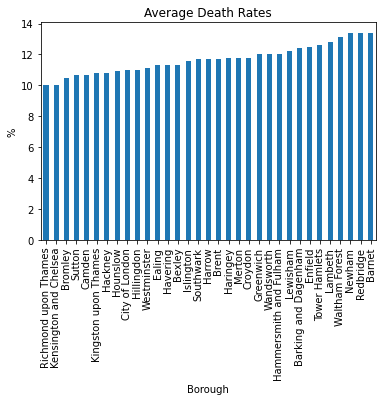

In [91]:
# Plot a bar graph of death rate averages for each borough
deathrates.sort_values('mean', ascending = True)['mean'].plot.bar()
plt.title('Average Death Rates')
plt.xlabel('Borough')
plt.ylabel('%')
plt.savefig('charts/bargraph_ave_deathrates.png')

# Identify the borough with the lowest average death rate
min = deathrates['mean'].idxmin()
print('The borough with the lowest average death rate is ' + str(min) + ' with a death rate of ' + str(deathrates['mean'].min()) + '%')

From the graph, it is observed that Richmond and Thames, Kensington and Chelsea, Bromley and Sutton have the lowest death rates. This allows us to identify that these areas have fewer enterprise deaths, which means that businesses started there are less likely to die. This offers insight on whether it would be a good idea to start a business there.

# Conclusion
Though Sutton was identified to have the largest proportion of businesses surviving for five years or more, it has the second-smallest number of active enterprises. Though businesses have a higher survivability rate in Sutton, it may not be the best place to start a business as the economic activity of the area might be lower. Thus, it is important to analyse the different factors of survival rate, number of active enterprises and death rates together.

To better understand the economic situation of each borough, the data on the number of active enterprises and death rates should be visualised together on a multivariate map. This is to get a better idea of the boroughs with a high number of active enterprises and a low death rate. This data can then be compared with the average 5-year survival rates, so that a suitable borough that offers the client's business to have the best chance of long-term survival can be chosen.

In conclusion, the data in this dataset is sufficient to provide thoughtful insight to answer the question: ' Which borough in London is the best place to start a business?'.